# PXD024844
# Age-related alterations in the testicular proteome of a non-human primate

[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD024844)

[Article link](https://www.mdpi.com/2073-4409/10/6/1306)


In [2]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

In [4]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD012477/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD024844/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25
0,AAAAAAAAAAAAAASAGGK15|[9999514]HexNAc[S],AAAAAAAAAAAAAASAGGK,A0A5F4VSA7_CALJA,NaN,NaN,3.520142e+06,0.0,0.000000e+00,0.000000e+00,2.392465e+06,0.000000e+00,0.000000e+00,1.645964e+06,0.000000e+00,2.392576e+06,NaN
1,AAAAAAAAAAAAAASAGGKnan,AAAAAAAAAAAAAASAGGK,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,AAAAAAAAAAAVSRnan,AAAAAAAAAAAVSR,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
3,AAAAAAAAAACAAGGR11|Gly->Cys[G],AAAAAAAAAACAAGGR,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,1.101212e+07,0.0,7.852184e+06,9.309453e+06,5.494329e+06,1.060986e+07,8.396718e+06,1.068060e+07,9.674947e+06,5.416492e+06,NaN


In [5]:
cols =[]
for i in quant.columns[5:-1]:
    cols.append(i)


In [6]:
OA.quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25
0,AAAAAAAAAAAAAASAGGK15|[9999514]HexNAc[S],AAAAAAAAAAAAAASAGGK,A0A5F4VSA7_CALJA,NaN,NaN,5.625285,NaN,NaN,NaN,5.334067,NaN,NaN,4.952129,NaN,5.342833,NaN
1,AAAAAAAAAAAAAASAGGKnan,AAAAAAAAAAAAAASAGGK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAAAVSRnan,AAAAAAAAAAAVSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAAACAAGGR11|Gly->Cys[G],AAAAAAAAAACAAGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,6.459465,NaN,6.241944,6.395240,6.053250,6.489961,6.369158,6.519298,6.413182,6.045755,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146977,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[13...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146978,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[4]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,5.453685,6.101512,5.891995,6.069852,5.919008,5.864054,5.950588,6.040631,6.018885,6.008198,NaN
146979,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[6]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146980,YYYVCQYCPAGNNVQTK8|[4]carbamidomethyl[C]|5|[6]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
summedintensities = OA.summedintensities(quant)
summedintensities

,Modifications,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25,Oxmod?
0,[1384]Homocysteic_acid[M],0.0,0.0,0.000000,0.000000,9.182761,0.000000,0.000000,0.000000,9.195407,2.980635,0.000000,8.887750,0.0,11
1,[1914]Met->AspSA[M],0.0,0.0,42.146579,47.122202,37.056308,42.958220,41.850415,46.973405,52.967609,53.157195,47.572781,46.596281,0.0,27
2,[1915]Decarboxylation[D],0.0,0.0,43.683809,48.330351,46.487647,46.551542,36.802917,28.303144,41.981985,54.128011,46.993274,40.460500,0.0,49
3,[1915]Decarboxylation[E],0.0,0.0,64.105756,57.065652,66.892319,59.772127,62.518469,48.503197,69.062733,79.849373,50.324373,63.208880,0.0,55
4,[1916]Aspartylurea[H],0.0,0.0,15.332555,12.945761,15.478325,8.537886,23.081217,18.993652,8.858590,17.693008,9.439568,8.578636,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,[743]4-ONE+Delta:H(-2)O(-1)[K],0.0,0.0,11.732963,6.654755,7.200534,6.756560,6.404602,6.822272,5.725203,5.934293,6.888656,6.551326,0.0,2
84,[860]G-H1[R],0.0,0.0,5.290241,5.509325,5.996203,6.343235,10.153827,5.423569,10.591521,10.432619,0.000000,6.386232,0.0,5
85,[936]Chlorination[Y],0.0,0.0,8.812886,9.379133,20.654732,3.998143,10.143101,13.662686,13.558833,16.245237,14.358682,19.083753,0.0,28
86,[937]dichlorination[Y],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4


In [8]:
YoungID = ["bellamo", "bendix", "ilineus", "kalonso", "primat", "vitali"]
OldID = ["ingwar", "obelisk", "timon", "wonny"]

In [9]:
Nonmodified = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("M")]
Sulfoxide = quant.loc[quant["Sequence"].str.contains("[35]oxidation[M]",regex=False)]
Sulfone = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[M]", regex = False)]
Homocysteic_acid = quant.loc[quant["Sequence"].str.contains("[1384]Homocysteic_acid[M]", regex = False)]
Nonmodifiednums = Nonmodified.append(Nonmodified.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfoxidenums = Sulfoxide.append(Sulfoxide.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfonenums = Sulfone.append(Sulfone.sum(numeric_only=True), ignore_index=True)[-1:]
Homocysteicnums = Homocysteic_acid.append(Homocysteic_acid.sum(numeric_only=True), ignore_index= True)[-1:]
moddf = [Nonmodifiednums, Sulfoxidenums, Sulfonenums, Homocysteicnums]

In [14]:
Youngdict = {}
Olddict = {}
for i, df in enumerate(moddf):
    Youngsub = df.loc[:, df.columns.str.contains("|".join(YoungID))]
    Oldsub = df.loc[:, df.columns.str.contains("|".join(OldID))]
    Youngsum = Youngsub.sum(axis=1)
    Oldsum = Oldsub.sum(axis=1)
    Youngdict[i] = Youngsum.values[0]
    Olddict[i] = Oldsum.values[0]

In [15]:
Youngdict

{0: 380757.5822420345,
 1: 72542.52110476735,
 2: 129.04630281861807,
 3: 21.0637914403854}

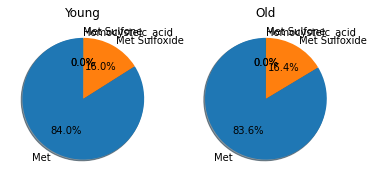

In [17]:
labels = ["Met", "Met Sulfoxide", "Met Sulfone", "Homocysteic_acid"]
sizesC = []
sizesT = []
for x, y in Youngdict.items():
    sizesC.append(y)
for x, y in Olddict.items():
    sizesT.append(y)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labels, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
plt.title("Methionine containing peptides")
ax1.set_title("Young")
ax2.set_title("Old")
plt.show()

In [31]:
NonmodifiedC = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("C")]
Sulfenic = quant.loc[quant["Sequence"].str.contains("[35]oxidation[C]",regex=False)]
Sulfinic = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[C]", regex = False)]
Cysteic = quant.loc[quant["Sequence"].str.contains("[345]Trioxidation[C]", regex = False)]
Non_modified = NonmodifiedC.append(NonmodifiedC.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfenic_acid = Sulfenic.append(Sulfenic.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfinic_acid = Sulfinic.append(Sulfinic.sum(numeric_only=True), ignore_index=True)[-1:]
Cysteic_acid = Cysteic.append(Cysteic.sum(numeric_only=True), ignore_index=True)[-1:]
moddfc = [Non_modified, Sulfenic_acid, Sulfinic_acid, Cysteic_acid]

In [36]:
Cysteic_acid

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25,Modifications
9,NaN,NaN,NaN,0.0,0.0,10.776744,11.108909,0.0,10.853262,10.981487,4.796922,10.807664,11.741017,0.0,4.592715,0.0,NaN


In [39]:
Youngdict = {}
Olddict = {}
for i, df in enumerate(moddfc):
    Youngsub = df.loc[:, df.columns.str.contains("|".join(YoungID))]
    Oldsub = df.loc[:, df.columns.str.contains("|".join(OldID))]
    Youngsum = Youngsub.sum(axis=1)
    Oldsum = Oldsub.sum(axis=1)
    Youngdict[i] = Youngsum.values[0]
    Olddict[i] = Oldsum.values[0]

['Cys', 'Sulfenic acid', 'Sulfinic acid', 'Cysteic acid']
[897.207972082748, 0.0, 191.17880209125457, 42.91980560044377]


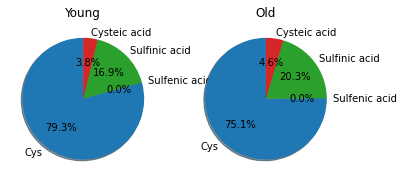

In [42]:
labelsC = ["Cys", "Sulfenic acid", "Sulfinic acid", "Cysteic acid"]
labelsT = ["Cys", "Sulfenic acid", "Sulfinic acid", "Cysteic acid"]
sizesC = []
sizesT = []

for x, y in Youngdict.items():
    sizesC.append(y)
for x, y in Olddict.items():
    sizesT.append(y)
print(labelsC)
print(sizesC)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labelsC, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labelsT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax1.set_title("Young")
ax2.set_title("Old")
plt.show()